In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
import sys
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS

In [2]:
ca = pd.read_csv('CAvideos.csv')

In [3]:
ca.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

In [4]:
ca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 16 columns):
video_id                  40881 non-null object
trending_date             40881 non-null object
title                     40881 non-null object
channel_title             40881 non-null object
category_id               40881 non-null int64
publish_time              40881 non-null object
tags                      40881 non-null object
views                     40881 non-null int64
likes                     40881 non-null int64
dislikes                  40881 non-null int64
comment_count             40881 non-null int64
thumbnail_link            40881 non-null object
comments_disabled         40881 non-null bool
ratings_disabled          40881 non-null bool
video_error_or_removed    40881 non-null bool
description               39585 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.2+ MB


In [5]:
ca.drop(['video_id','publish_time','video_error_or_removed','ratings_disabled','comments_disabled','tags'], axis=1 ,inplace = True)

In [6]:
ca.head()

,trending_date,title,channel_title,category_id,views,likes,dislikes,comment_count,thumbnail_link,description
0,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,Eminem's new track Walk on Water ft. Beyoncé i...
1,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,STill got a lot of packages. Probably will las...
2,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,I know it's been a while since we did this sho...
4,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


In [7]:
ca.tail()

,trending_date,title,channel_title,category_id,views,likes,dislikes,comment_count,thumbnail_link,description
40876,18.14.06,HOW2: How to Solve a Mystery,Annoying Orange,24,80685,1701,99,1312,https://i.ytimg.com/vi/sGolxsMSGfQ/default.jpg,🚨 NEW MERCH! http://amzn.to/annoyingorange 🚨➤ ...
40877,18.14.06,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,24,103339,460,66,51,https://i.ytimg.com/vi/8HNuRNi8t70/default.jpg,► Retrouvez vos programmes préférés : https://...
40878,18.14.06,KINGDOM HEARTS III – SQUARE ENIX E3 SHOWCASE 2...,Kingdom Hearts,20,773347,25900,224,3881,https://i.ytimg.com/vi/GWlKEM3m2EE/default.jpg,Find out more about Kingdom Hearts 3: https://...
40879,18.14.06,Trump Advisor Grovels To Trudeau,The Young Turks,25,115225,2115,182,1672,https://i.ytimg.com/vi/lbMKLzQ4cNQ/default.jpg,Peter Navarro isn’t talking so tough now. Ana ...
40880,18.14.06,【完整版】遇到恐怖情人該怎麼辦？2018.06.13小明星大跟班,我愛小明星大跟班,24,107392,300,62,251,https://i.ytimg.com/vi/POTgw38-m58/default.jpg,藝人：李妍瑾、玉兔、班傑、LaLa、小優、少少專家：陳筱屏(律師)、Wendy(心理師)、羅...


In [13]:
f_mostlikes_channel = ca.likes > 2500000
f_mostviews_channel = ca.views > 10000000
f_mostdislike_channel = ca.dislikes > 5000
f_mostcomment_channel = ca.comment_count > 1000000
ca[f_mostlikes_channel & f_mostviews_channel & f_mostcomment_channel]

,trending_date,title,channel_title,category_id,views,likes,dislikes,comment_count,thumbnail_link,description
35900,18.21.05,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,65396157,4750254,141966,1040912,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...
36153,18.22.05,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,73463137,4924056,156026,1084435,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...
36453,18.23.05,BTS (방탄소년단) 'FAKE LOVE' Official MV,ibighit,10,80738011,5053338,165854,1114800,https://i.ytimg.com/vi/7C2z4GqqS5E/default.jpg,BTS (방탄소년단) 'FAKE LOVE' Official MVDirector : ...


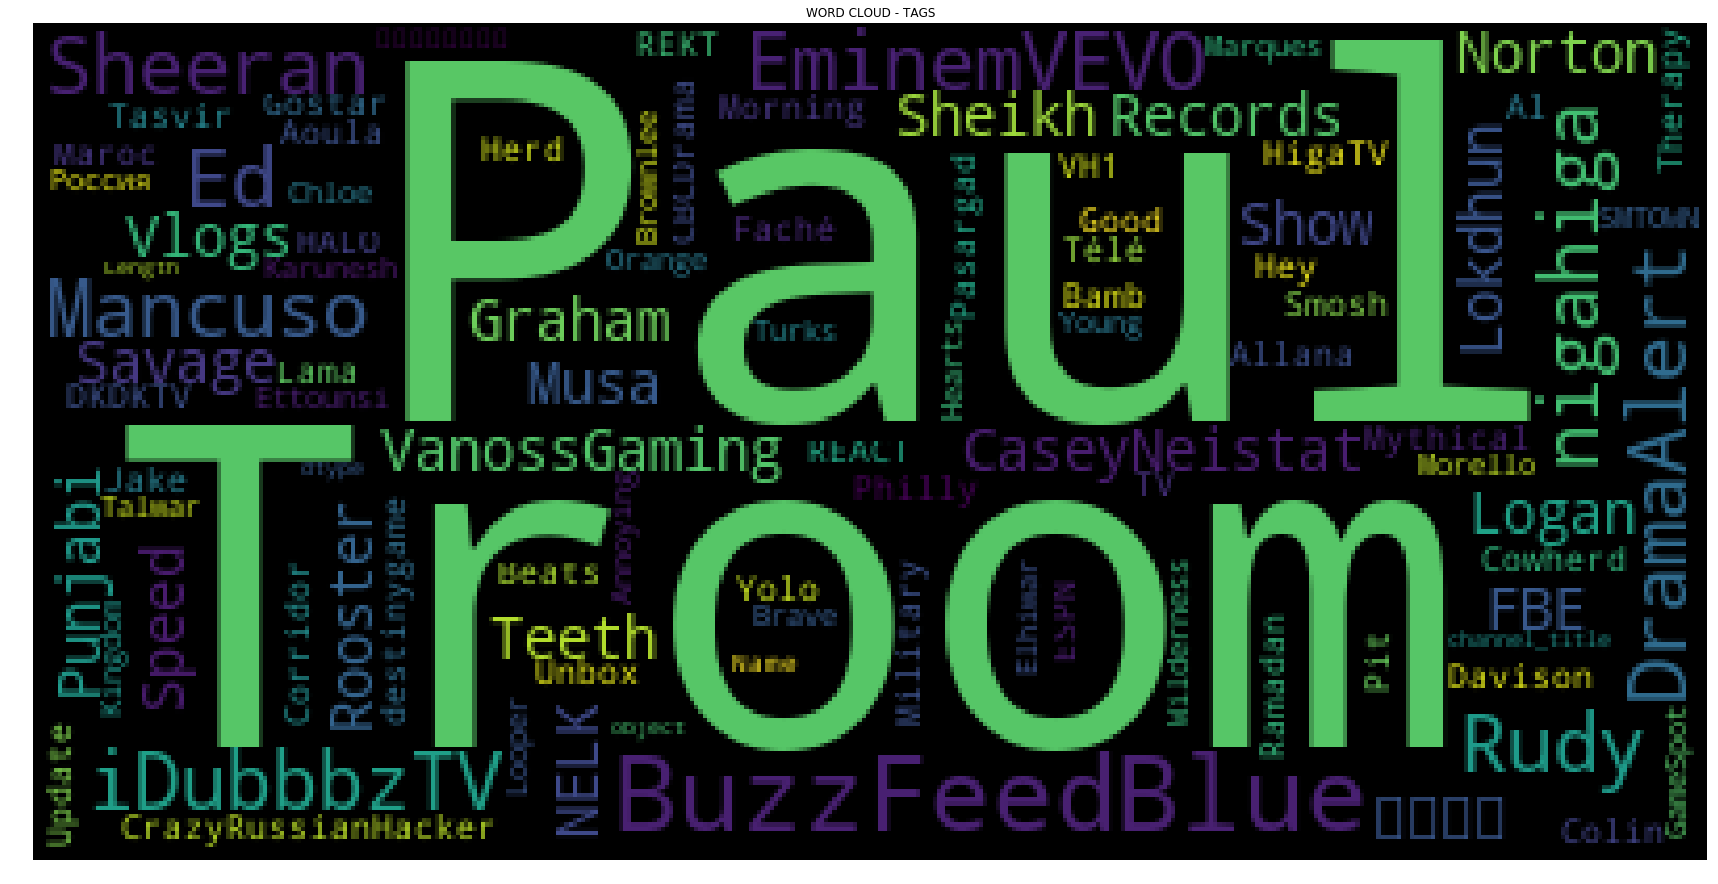

In [14]:
df_youtube = pd.DataFrame(ca)
plt.figure(figsize = (30,30))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=1200,
                          max_font_size=120, 
                          random_state=42
                         ).generate(str(df_youtube['channel_title']))
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - TAGS")
plt.axis('off')
plt.show()

C:\Users\hmdmr\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


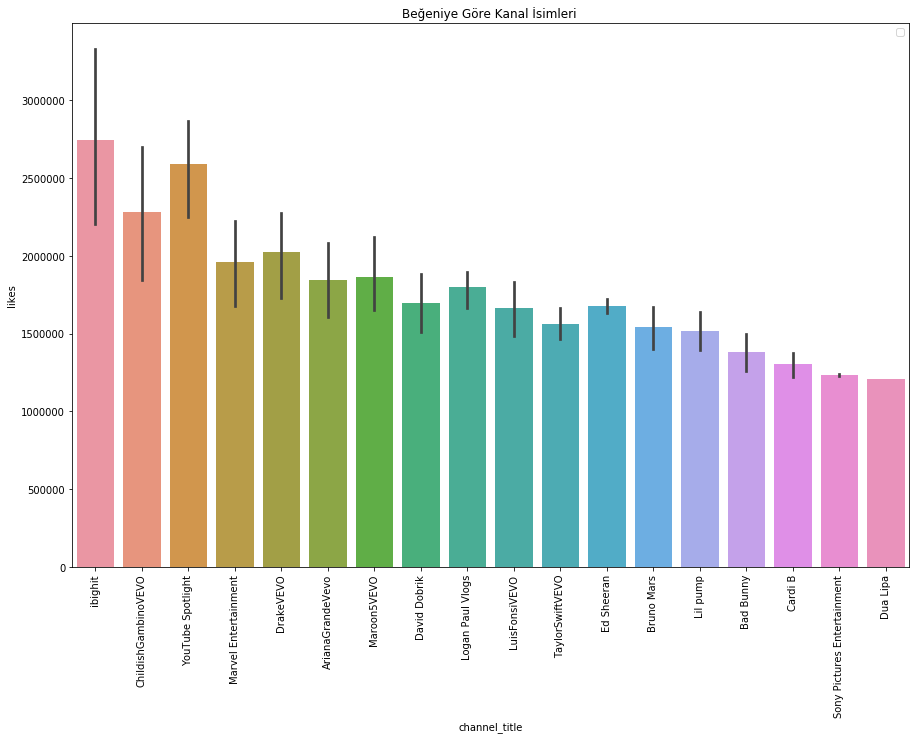

In [15]:
new_index = ca['likes'].sort_values(ascending = False).index.values
sorted_data = ca.reindex(new_index)
plt.figure(figsize = (15,10))
sns.barplot(x = sorted_data['channel_title'].head(100) , y = sorted_data['likes'].head(100),data = sorted_data)
plt.xticks(Rotation = 90)
plt.legend(loc = 'upper right')
plt.title('Beğeniye Göre Kanal İsimleri ')
plt.show()

C:\Users\hmdmr\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


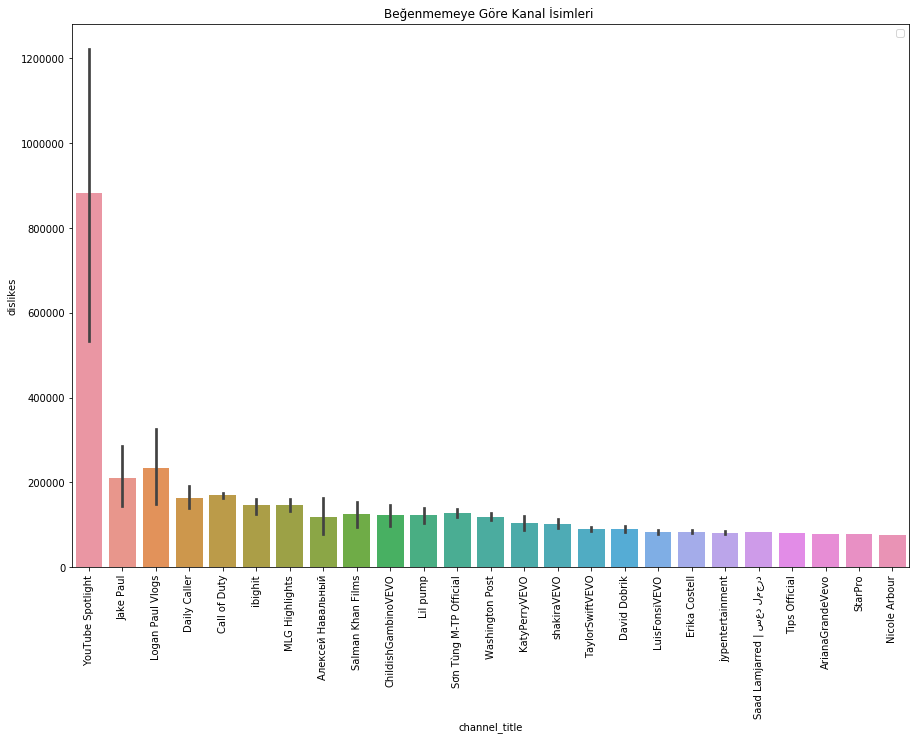

In [22]:
new_index = ca['dislikes'].sort_values(ascending = False).index.values
sorted_data = ca.reindex(new_index)
plt.figure(figsize = (15,10))
sns.barplot(x = sorted_data['channel_title'].head(100) , y = sorted_data['dislikes'].head(100),data = ca)
plt.xticks(Rotation = 90)
plt.legend(loc = 'upper right')
plt.title('Beğenmemeye Göre Kanal İsimleri ')
plt.show()

C:\Users\hmdmr\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


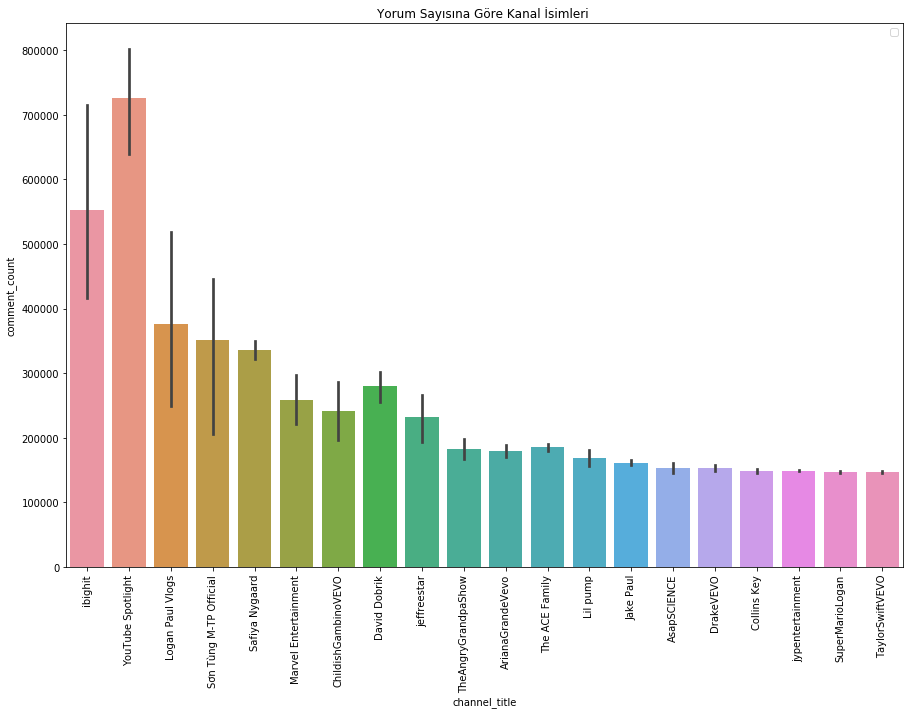

In [17]:
new_index = ca['comment_count'].sort_values(ascending = False).index.values
sorted_data = ca.reindex(new_index)
plt.figure(figsize = (15,10))
sns.barplot(x = sorted_data['channel_title'].head(100) , y = sorted_data['comment_count'].head(100),data = ca)
plt.xticks(Rotation = 90)
plt.legend(loc = 'upper right')
plt.title('Yorum Sayısına Göre Kanal İsimleri ')
plt.show()

C:\Users\hmdmr\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
No handles with labels found to put in legend.


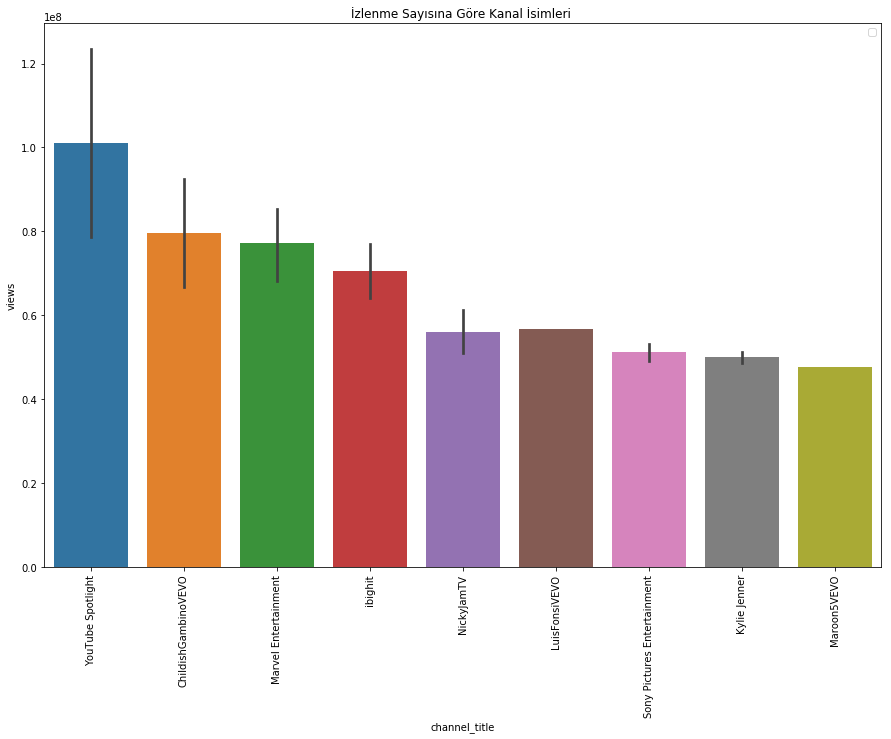

In [20]:
new_index = ca['views'].sort_values(ascending = False).index.values
sorted_data = ca.reindex(new_index)
plt.figure(figsize = (15,10))
sns.barplot(x = sorted_data['channel_title'].head(30) , y = sorted_data['views'].head(30),data = ca)
plt.xticks(Rotation = 90)
plt.legend(loc = 'upper right')
plt.title('İzlenme Sayısına Göre Kanal İsimleri ')
plt.show()